## define the function

In [1]:
# let's get some 1 minute bar data using alphavantage.co
# register for an APIKEY at alphavantage.co
# NOTE: you must set outputsize = full in your url otherwise you get truncated data
# SOURCE: https://www.alphavantage.co/

import pandas as pd
import io
import requests

# TODO: replace with your own API key
apikey = "G9X6PNM9DW17K47X"

# get daily stock prices
def getDailyStockPrices(symbol):
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol='+symbol+'&apikey='+apikey+'&datatype=csv'
    s = requests.get(url).content
    symbol_df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    symbol_df = symbol_df.sort_values('timestamp', ascending=True)
    converted_timestamp = pd.to_datetime(symbol_df['timestamp'], infer_datetime_format=True)
    symbol_df.index = converted_timestamp
    symbol_df = symbol_df.drop(columns = ['timestamp'])
    return symbol_df

# get minute stock prices
def getMinuteStockPrices(symbol):
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&interval=1min&outputsize=full&symbol='+symbol+'&apikey='+apikey+'&datatype=csv'
    s = requests.get(url).content
    symbol_df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    symbol_df = symbol_df.sort_values('timestamp', ascending=True)
    converted_timestamp = pd.to_datetime(symbol_df['timestamp'], infer_datetime_format=True)
    symbol_df.index = converted_timestamp
    symbol_df = symbol_df.drop(['timestamp'], axis= 1)
    return symbol_df

# get minute stock prices
def getLatestStockPrice(symbol):
    url = 'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol=' + symbol + '&apikey=' + apikey + '&datatype=csv'
    s = requests.get(url).content
    symbol_df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    return symbol_df['price'].values[0]


## download data of stock

In [2]:
symbol = 'MSFT'
history_data_MSFT_1min = getMinuteStockPrices(symbol)
print(type(history_data_MSFT_1min))

<class 'pandas.core.frame.DataFrame'>


## data processing

In [3]:
chart_date = '2019-04-09'
history_data_MSFT_1min_chart_date = history_data_MSFT_1min[chart_date]
history_data_MSFT_1min_chart_date.head(3)

,open,high,low,close,volume
timestamp,,,,,
2019-04-09 09:31:00,118.58,119.0400,118.580,119.04,705819
2019-04-09 09:32:00,119.09,119.0983,118.960,119.02,76682
2019-04-09 09:33:00,118.99,119.0700,118.875,119.06,124931


## draw picture of price and volume of the stock

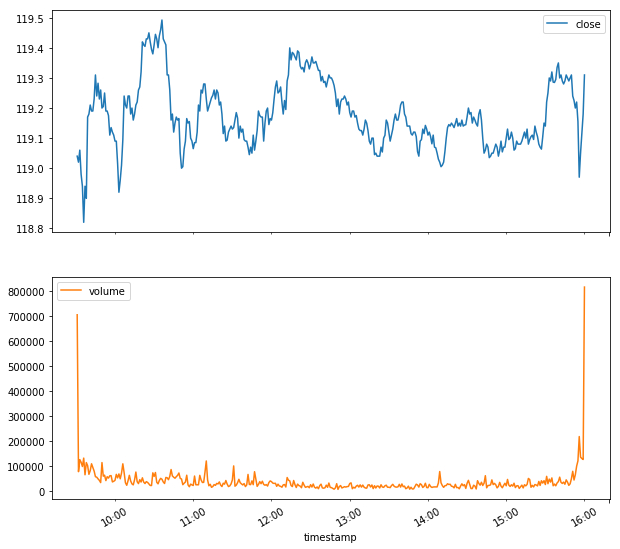

In [9]:
import matplotlib.pyplot as plt
history_data_MSFT_1min_chart_date[[ 'close', 'volume']].plot(subplots =True, figsize = (10, 10))
plt.show()

##  calculate and display summary descriptive statistics

In [11]:
import numpy as np
history_data_MSFT_1min_chart_date_describe = history_data_MSFT_1min_chart_date.describe()
history_data_MSFT_1min_chart_date_describe

,open,high,low,close,volume
count,390.000000,390.000000,390.000000,390.000000,390.000000
mean,119.176571,119.201441,119.154996,119.178383,37213.220513
std,0.114327,0.108334,0.116248,0.109774,58133.701801
min,118.580000,118.940000,118.580000,118.820000,5633.000000
25%,119.100000,119.120000,119.080000,119.100000,17603.500000
50%,119.160000,119.180000,119.140000,119.160000,25515.500000
75%,119.250000,119.270600,119.220000,119.250000,40728.000000
max,119.520000,119.540000,119.470000,119.492700,816874.000000


In [12]:
history_data_MSFT_1min_totle_volume_chart_date = np.sum(history_data_MSFT_1min_chart_date['volume'])
history_data_MSFT_1min_totle_amount_chart_date = np.sum(history_data_MSFT_1min_chart_date['volume'] * history_data_MSFT_1min_chart_date['close'])
history_data_MSFT_1min_vwap_chart_date = history_data_MSFT_1min_totle_amount_chart_date / history_data_MSFT_1min_totle_volume_chart_date
print("Totle volume of Microsoft's stock for "+chart_date+" is %hd" % history_data_MSFT_1min_totle_volume_chart_date)
print("Volume Weighted Average Price of Microsoft's stock for "+chart_date+" is %hf" % history_data_MSFT_1min_vwap_chart_date)

Totle volume of Microsoft's stock for 2019-04-09 is 14513156
Volume Weighted Average Price of Microsoft's stock for 2019-04-09 is 119.171054
